## **BUSSINES UNDERSTANDING**

### **Latar Belakang**

Damara Store adalah toko retail online yang menyediakan berbagai produk konsumen untuk memenuhi kebutuhan pelanggan. Dalam era digital yang kompetitif, menjaga loyalitas pelanggan menjadi tantangan utama bagi bisnis retail. Retensi pelanggan yang kuat tidak hanya mengurangi biaya akuisisi pelanggan baru tetapi juga membantu meningkatkan pendapatan melalui pembelian ulang. Oleh karena itu, memahami perilaku dan preferensi pelanggan menjadi kunci untuk menciptakan strategi pemasaran yang lebih relevan dan personal.

### **Pertanyaan Bisnis**
**Wawasan apa yang dapat diperoleh dari perilaku pelanggan untuk mengoptimalkan strategi pemasaran?**  
   Bagaimana segmentasi pelanggan dapat digunakan untuk menciptakan kampanye pemasaran yang lebih efektif dan tepat sasaran?

### **Tujuan**
   Melakukan segmentasi pelanggan berdasarkan karakteristik atau perilaku tertentu untuk mendapatkan wawasan yang dapat digunakan dalam menyusun strategi pemasaran yang lebih efektif dan relevan.

## **DATA UNDERSTANDING**

### **Deskripsi Variabel Dataset**

Dari dataset yang dimiliki terdapat beberapa data yang tersedia:
1. `order_id`: ID unik untuk setiap pesanan.
2. `product_code`: Kode unik untuk setiap produk yang dipesan.
3. `product_name`: Nama produk yang dipesan.
4. `quantity`: Jumlah produk dalam pesanan. Nilai negatif mungkin menunjukkan pengembalian produk.
5. `order_date`: Tanggal dan waktu saat pesanan dilakukan.
6. `price`: Harga per unit dari produk yang dipesan.
7. `customer_id`: ID unik pelanggan yang melakukan pesanan.

### **Data Overview**

In [90]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import datetime as dt

# Import library viusalisasi
import matplotlib.pyplot as plt

In [91]:
# Load dataset yang akan digunakan
df = pd.read_csv('../data/Online_Retail_Data.csv')
df

,order_id,product_code,product_name,quantity,order_date,price,customer_id
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN
...,...,...,...,...,...,...,...
461768,539991,21618,4 WILDFLOWER BOTANICAL CANDLES,1,2010-12-23 16:49:00,1.25,NaN
461769,539991,72741,GRAND CHOCOLATECANDLE,4,2010-12-23 16:49:00,1.45,NaN
461770,539992,21470,FLOWER VINE RAFFIA FOOD COVER,1,2010-12-23 17:41:00,3.75,NaN
461771,539992,22258,FELT FARM ANIMAL RABBIT,1,2010-12-23 17:41:00,1.25,NaN


In [92]:
# melihat bentuk dataset
df.shape

(461773, 7)

In [93]:
# melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461773 entries, 0 to 461772
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   order_id      461773 non-null  object 
 1   product_code  461773 non-null  object 
 2   product_name  459055 non-null  object 
 3   quantity      461773 non-null  int64  
 4   order_date    461773 non-null  object 
 5   price         461773 non-null  float64
 6   customer_id   360853 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 24.7+ MB


In [94]:
# melihat deskripsi statistik dataset
df.describe()

,quantity,price,customer_id
count,461773.000000,461773.000000,360853.000000
mean,9.088892,4.569963,15557.611138
std,86.366467,153.411566,1593.728741
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,14210.000000
50%,3.000000,2.100000,15580.000000
75%,10.000000,4.210000,16938.000000
max,10200.000000,25111.090000,18287.000000


In [95]:
# Melihat jumlah nilai null pada dataset
df.isnull().sum()

order_id             0
product_code         0
product_name      2718
quantity             0
order_date           0
price                0
customer_id     100920
dtype: int64

In [96]:
# melihat jumlah nilai duplikat
df.duplicated().sum()

6479

## **DATA CLEANSING**

Data cleansing dilakukan untuk memastikan data dalam kondisi bersih, konsisten, dan bebas dari kesalahan. Proses ini mencakup berbagai langkah untuk meningkatkan kualitas data, sehingga analisis dapat dilakukan secara akurat dan menghasilkan wawasan yang dapat diandalkan.

In [97]:
# membuat salinan dataset
df_clean = df.copy()

#### **Konversi Tanggal dan Penambahan Kolom Baru**
 Mengubah format kolom **order_date** menjadi tipe data datetime agar bisa diproses lebih lanjut. Kemudian menambahkan kolom baru **year_month** yang berisi periode bulan dan tahun dari tanggal pemesanan.

In [98]:
# Mengkonversi kolom order_date menjadi datetime
df_clean['order_date'] = df_clean['order_date'].astype('datetime64[ns]')
# membuat kolom date
df_clean['date'] = pd.to_datetime(df_clean['order_date']).dt.date.astype('datetime64[ns]')
# membuat kolom year_month
df_clean['year_month'] = df_clean['order_date'].dt.to_period('M')

df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month
0,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.0,2010-01-04,2010-01
1,C493411,21539,RETRO SPOTS BUTTER DISH,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,2010-01
2,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.0,2010-01-04,2010-01
3,493413,21724,PANDA AND BUNNIES STICKER SHEET,1,2010-01-04 09:54:00,0.85,NaN,2010-01-04,2010-01
4,493413,84578,ELEPHANT TOY WITH BLUE T-SHIRT,1,2010-01-04 09:54:00,3.75,NaN,2010-01-04,2010-01


#### **Pembersihan Data yang Hilang**

Menghapus baris-baris yang tidak memiliki nilai pada kolom **customer_id** dan product_name karena data tersebut tidak valid untuk analisis lebih lanjut.

In [99]:
# menghapus baris yang memiliki nilai null
df_clean = df_clean.dropna()

# mengecek apakah masih ada nilai null atau tidak
df_clean.isnull().sum()

order_id        0
product_code    0
product_name    0
quantity        0
order_date      0
price           0
customer_id     0
date            0
year_month      0
dtype: int64

#### **Menghapus Data Test**

Mengubah semua nilai pada kolom **product_name** menjadi huruf kecil untuk konsistensi data Kemudian menghapus semua baris yang mengandung informasi mengenai produk pengujian dengan kata "test" pada kolom **product_code** dan **product_name**.

In [100]:
# membuat semua product_name berhuruf kecil
df_clean['product_name'] = df_clean['product_name'].str.lower()
# menghapus semua baris dengan product_code atau product_name test
df_clean = df_clean[(~df_clean['product_code'].str.lower().str.contains('test')) |
                    (~df_clean['product_name'].str.contains('test'))]

df_clean.head()

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month
1,C493411,21539,retro spots butter dish,-1,2010-01-04 09:43:00,4.25,14590.0,2010-01-04,2010-01
6,493414,21844,retro spot mug,36,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,2010-01
7,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590.0,2010-01-04,2010-01
8,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590.0,2010-01-04,2010-01
9,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590.0,2010-01-04,2010-01


#### **Menambahkan Status Order**
Membuat kolom **order_status** yang mengidentifikasi apakah pesanan dibatalkan atau dikirim berdasarkan awalan pada order_id. Jika order_id dimulai dengan 'C', statusnya adalah 'cancelled', jika tidak maka 'delivered'.

In [101]:
# membuat kolom order_status dengan nilai 'cancelled' jika order_id diawali dengan huruf 'c' dan 'delivered' jika order_id tanpa awalan huruf 'c'
df_clean['order_status'] = np.where(df_clean['order_id'].str[:1]=='C', 'cancelled', 'delivered')

#### **Pembersihan Data Quantity dan Data Harga**

Mengubah nilai negatif pada kolom **quantity** menjadi positif, karena nilai negatif biasanya menunjukkan pesanan yang dibatalkan, namun yang diinginkan adalah jumlah produk yang sebenarnya dipesan. Kemudian
menghapus baris dengan nilai harga (price) yang negatif karena harga tidak boleh bernilai negatif dalam konteks transaksi.

In [102]:
# mengubah nilai quantity yang negatif menjadi positif
df_clean['quantity'] = df_clean['quantity'].abs()
# menghapus baris dengan price bernilai negatif
df_clean = df_clean[df_clean['price']>0]

#### **Membuat kolom Amount**
Membuat kolom baru **amount** yang dihitung dari perkalian antara **quantity** dan **price** untuk memperoleh total nilai transaksi per produk.

In [103]:
# membuat nilai amount, yaitu perkalian antara quantity dan price
df_clean['amount'] = df_clean['quantity'] * df_clean['price']

#### **Mengganti Nama Produk yang Tidak Konsisten**
Mengganti nama produk untuk setiap **product_code** yang memiliki beberapa nama produk dengan nama yang paling sering muncul, untuk menjaga konsistensi data.

In [104]:
# mengganti product_name dari product_code yang memiliki beberapa product_name
most_freq_product_name = df_clean.groupby(['product_code','product_name'], as_index=False).agg(order_cnt=('order_id','nunique')).sort_values(['product_code','order_cnt'], ascending=[True,False])
most_freq_product_name['rank'] = most_freq_product_name.groupby('product_code')['order_cnt'].rank(method='first', ascending=False)
most_freq_product_name = most_freq_product_name[most_freq_product_name['rank']==1].drop(columns=['order_cnt','rank'])
df_clean = df_clean.merge(most_freq_product_name.rename(columns={'product_name':'most_freq_product_name'}), how='left', on='product_code')
df_clean['product_name'] = df_clean['most_freq_product_name']
df_clean = df_clean.drop(columns='most_freq_product_name')

#### **Mengkonversi Customer ID**
Mengubah kolom **customer_id** menjadi tipe data string untuk memastikan konsistensi data pada seluruh dataset. dan juga menghapus nilai dibelakang koma.

In [105]:
# Mengkonversi customer_id menjadi string
df_clean['customer_id'] = df_clean['customer_id'].astype(str)

# Menghapus nilai di belakang koma (jika ada)
df_clean['customer_id'] = df_clean['customer_id'].str.split('.').str[0]

#### **Menghapus Nilai Outlier**

Menghapus baris yang mengandung nilai outlier pada kolom **quantity** dan **amount** menggunakan metode Z-Score. Outlier yang melebihi batas Z-Score 3 dianggap sebagai data yang tidak wajar.

In [106]:
# menghapus outlier
from scipy import stats
df_clean = df_clean[(np.abs(stats.zscore(df_clean[['quantity','amount']]))<3).all(axis=1)]

# reset index
df_clean = df_clean.reset_index(drop=True)
df_clean

,order_id,product_code,product_name,quantity,order_date,price,customer_id,date,year_month,order_status,amount
0,C493411,21539,red retrospot butter dish,1,2010-01-04 09:43:00,4.25,14590,2010-01-04,2010-01,cancelled,4.25
1,493414,21844,red retrospot mug,36,2010-01-04 10:28:00,2.55,14590,2010-01-04,2010-01,delivered,91.80
2,493414,21533,retro spot large milk jug,12,2010-01-04 10:28:00,4.25,14590,2010-01-04,2010-01,delivered,51.00
3,493414,37508,new england ceramic cake server,2,2010-01-04 10:28:00,2.55,14590,2010-01-04,2010-01,delivered,5.10
4,493414,35001G,hand open shape gold,2,2010-01-04 10:28:00,4.25,14590,2010-01-04,2010-01,delivered,8.50
...,...,...,...,...,...,...,...,...,...,...,...
358464,539988,84380,set of 3 butterfly cookie cutters,1,2010-12-23 16:06:00,1.25,18116,2010-12-23,2010-12,delivered,1.25
358465,539988,84849D,hot baths soap holder,1,2010-12-23 16:06:00,1.69,18116,2010-12-23,2010-12,delivered,1.69
358466,539988,84849B,fairy soap soap holder,1,2010-12-23 16:06:00,1.69,18116,2010-12-23,2010-12,delivered,1.69
358467,539988,22854,cream sweetheart egg holder,2,2010-12-23 16:06:00,4.95,18116,2010-12-23,2010-12,delivered,9.90


In [107]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358469 entries, 0 to 358468
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      358469 non-null  object        
 1   product_code  358469 non-null  object        
 2   product_name  358469 non-null  object        
 3   quantity      358469 non-null  int64         
 4   order_date    358469 non-null  datetime64[ns]
 5   price         358469 non-null  float64       
 6   customer_id   358469 non-null  object        
 7   date          358469 non-null  datetime64[ns]
 8   year_month    358469 non-null  period[M]     
 9   order_status  358469 non-null  object        
 10  amount        358469 non-null  float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(5), period[M](1)
memory usage: 30.1+ MB


### **Clean Data**

In [108]:
df_clean.to_csv('../data/Online_Retail_Data_Clean.csv', index=False)

## **CUSTOMER SEGMENTATION (RFM)**

User Segmentation adalah sebuah algoritma yang digunakan untuk mengelompokkan pelanggan berdasarkan berbagai segmen, sehingga dapat memahami karakteristik masing-masing kelompok untuk strategi pemasaran yang lebih efektif

### **Menyusun Ringkasan Transaksi untuk Setiap Pengguna**

Membuat ringkasan data transaksi untuk setiap pengguna, yang mencakup: total jumlah pesanan (**total transaksi/order**), total nilai pesanan (**total order value**), dan **tanggal pesanan terakhir**. Ringkasan ini memberikan gambaran lengkap mengenai perilaku transaksi tiap pengguna dari sisi frekuensi, nilai pembelian, serta waktu terakhir mereka melakukan pesanan.

In [109]:
# jumlah order, tanggal order terakhir, dan total nilai order.
df_user = df_clean.groupby('customer_id', as_index=False).agg(
    order_cnt=('order_id', 'nunique'),
    max_order_date=('date', 'max'),
    total_order_value=('amount', 'sum')
)

# Tampilkan 5 baris pertama df_user.
df_user.head()

,customer_id,order_cnt,max_order_date,total_order_value
0,12346,5,2010-10-04,602.40
1,12608,1,2010-10-31,415.79
2,12745,2,2010-08-10,723.85
3,12746,2,2010-06-30,266.35
4,12747,19,2010-12-13,4094.79


### **Menambahkan Kolom Jumlah Hari Sejak Pesanan Terakhir**

Membuat kolom baru yang menghitung jumlah hari sejak tanggal pesanan terakhir untuk setiap pengguna. Kolom ini berguna untuk mengetahui waktu yang telah berlalu sejak aktivitas terakhir pengguna, membantu analisis perilaku pelanggan dan mengidentifikasi pengguna yang mungkin tidak aktif.

In [110]:
# Tanggal terakhir dalam dataset
today = df_clean['date'].max()

# Hitung selisih hari sejak pesanan terakhir
df_user['day_since_last_order'] = (today - df_user['max_order_date']).dt.days

# Tampilkan DataFrame df_user
df_user.head()

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order
0,12346,5,2010-10-04,602.40,80
1,12608,1,2010-10-31,415.79,53
2,12745,2,2010-08-10,723.85,135
3,12746,2,2010-06-30,266.35,176
4,12747,19,2010-12-13,4094.79,10


In [111]:
# melihat deskripsi statistik data
df_user.describe()

,order_cnt,max_order_date,total_order_value,day_since_last_order
count,3889.000000,3889,3889.000000,3889.000000
mean,5.128568,2010-09-23 04:46:57.793777664,1544.623084,90.800720
min,1.000000,2010-01-05 00:00:00,1.250000,0.000000
25%,1.000000,2010-08-19 00:00:00,296.360000,25.000000
50%,3.000000,2010-10-26 00:00:00,648.200000,58.000000
75%,6.000000,2010-11-28 00:00:00,1585.940000,126.000000
max,163.000000,2010-12-23 00:00:00,71970.390000,352.000000
std,8.499330,NaN,3434.816315,88.873286


In [112]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 152.0+ KB


### **Mengelompokkan Jumlah Hari Sejak Pesanan Terakhir ke dalam 5 Kelompok (Binning)**

Melakukan binning pada kolom jumlah hari sejak pesanan terakhir dengan membagi data ke dalam 5 kelompok berdasarkan nilai minimum (**min**), persentil ke-20 (**P20**), persentil ke-40 (**P40**), persentil ke-60 (**P60**), persentil ke-80 (**P80**), dan nilai maksimum (**max**). Setiap bin diberi label dari 1 hingga 5, di mana bin dengan jumlah hari terbesar mendapatkan skor **1** (artinya aktivitas terbaru paling lama), dan bin dengan jumlah hari terkecil mendapatkan skor **5** (artinya aktivitas terbaru paling dekat). Skor ini dikenal sebagai **Recency Score** untuk menilai seberapa baru pengguna melakukan aktivitas terakhirnya.

In [113]:
# Menghitung Recency Score dan menambahkannya sebagai kolom baru di df_user
df_user['recency_score'] = pd.cut(df_user['day_since_last_order'], # Data yang akan dikelompokkan (hari sejak pesanan terakhir)
                                    bins=[
                                        df_user['day_since_last_order'].min(),  # Nilai minimum untuk pengelompokan
                                        np.percentile(df_user['day_since_last_order'], 20),  # Persentil ke-20
                                        np.percentile(df_user['day_since_last_order'], 40),  # Persentil ke-40
                                        np.percentile(df_user['day_since_last_order'], 60),  # Persentil ke-60
                                        np.percentile(df_user['day_since_last_order'], 80),  # Persentil ke-80
                                        df_user['day_since_last_order'].max()],   # Nilai maksimum untuk pengelompokan
                                    labels=[5, 4, 3, 2, 1],  # Label untuk setiap kelompok (Recency Score)
                                    include_lowest=True).astype(int)

df_user.head()

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score
0,12346,5,2010-10-04,602.40,80,2
1,12608,1,2010-10-31,415.79,53,3
2,12745,2,2010-08-10,723.85,135,2
3,12746,2,2010-06-30,266.35,176,1
4,12747,19,2010-12-13,4094.79,10,5


In [114]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3889 entries, 0 to 3888
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   customer_id           3889 non-null   object        
 1   order_cnt             3889 non-null   int64         
 2   max_order_date        3889 non-null   datetime64[ns]
 3   total_order_value     3889 non-null   float64       
 4   day_since_last_order  3889 non-null   int64         
 5   recency_score         3889 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(1)
memory usage: 167.2+ KB


### **Mengelompokkan Total Transaksi ke dalam 5 Kelompok (Binning)**

Melakukan binning pada kolom total transaksi (order) dengan membagi data menjadi 5 kelompok berdasarkan nilai minimum (**min**), persentil ke-20 (**P20**), persentil ke-40 (**P40**), persentil ke-60 (**P60**), persentil ke-80 (**P80**), dan nilai maksimum (**max**). Setiap bin diberi label dari **1** hingga **5**, di mana bin dengan jumlah transaksi terendah diberi skor **1**, dan bin dengan jumlah transaksi tertinggi diberi skor **5**. Skor ini disebut **Frequency Score** dan digunakan untuk menilai seberapa sering pengguna melakukan transaksi.

In [115]:
# Menghitung Recency Score dan menambahkannya sebagai kolom baru di df_user
df_user['frequency_score'] = pd.cut(df_user['order_cnt'], # Data yang akan dikelompokkan
                                    bins=[0,  # Nilai minimum untuk pengelompokan
                                        np.percentile(df_user['order_cnt'], 20),  # Persentil ke-20
                                        np.percentile(df_user['order_cnt'], 40),  # Persentil ke-40
                                        np.percentile(df_user['order_cnt'], 60),  # Persentil ke-60
                                        np.percentile(df_user['order_cnt'], 80),  # Persentil ke-80
                                        df_user['order_cnt'].max()],   # Nilai maksimum untuk pengelompokan
                                    labels=[1, 2, 3, 4, 5],  # Label untuk setiap kelompok
                                    include_lowest=True, duplicates='drop').astype(int)

df_user.head()

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score
0,12346,5,2010-10-04,602.40,80,2,4
1,12608,1,2010-10-31,415.79,53,3,1
2,12745,2,2010-08-10,723.85,135,2,2
3,12746,2,2010-06-30,266.35,176,1,2
4,12747,19,2010-12-13,4094.79,10,5,5


### **Pengelompokan Total Nilai Pesanan untuk Menentukan Skor Monetary**

Melakukan binning pada total nilai pesanan (order value) menjadi 5 kelompok berdasarkan min, P20, P40, P60, P80, dan max. Kelompok diberi skor 1-5, di mana nilai terendah mendapat skor 1, dan tertinggi 5. Skor ini mengukur kontribusi finansial tiap pengguna.

In [116]:
# Menghitung Recency Score dan menambahkannya sebagai kolom baru di df_user
df_user['monetary_score'] = pd.cut(df_user['total_order_value'], # Data yang akan dikelompokkan
                                    bins=[
                                        df_user['total_order_value'].min(),  # Nilai minimum untuk pengelompokan
                                        np.percentile(df_user['total_order_value'], 20),  # Persentil ke-20
                                        np.percentile(df_user['total_order_value'], 40),  # Persentil ke-40
                                        np.percentile(df_user['total_order_value'], 60),  # Persentil ke-60
                                        np.percentile(df_user['total_order_value'], 80),  # Persentil ke-80
                                        df_user['total_order_value'].max()],   # Nilai maksimum untuk pengelompokan
                                    labels=[1, 2, 3, 4, 5],  # Label untuk setiap kelompok
                                    include_lowest=True).astype(int)

df_user.head()

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score
0,12346,5,2010-10-04,602.40,80,2,4,3
1,12608,1,2010-10-31,415.79,53,3,1,2
2,12745,2,2010-08-10,723.85,135,2,2,3
3,12746,2,2010-06-30,266.35,176,1,2,2
4,12747,19,2010-12-13,4094.79,10,5,5,5


### **Menentukan Nama Segmen Berdasarkan Skor Recency dan Frequency**

Membuat kolom baru untuk menetapkan nama segmen pengguna berdasarkan kombinasi skor **Recency** dan **Frequency**. Segmen ini membantu mengkategorikan pengguna ke dalam kelompok tertentu sesuai dengan pola perilaku mereka, seperti:  

- **High Frequency, Low Recency**: Pengguna aktif yang sering bertransaksi baru-baru ini.  
- **High Frequency, High Recency**: Pengguna sering tetapi sudah lama tidak aktif.  
- **Low Frequency, Low Recency**: Pengguna jarang tetapi masih cukup baru bertransaksi.  
- **Low Frequency, High Recency**: Pengguna jarang dan sudah lama tidak bertransaksi.  

Segmen ini dapat digunakan untuk strategi pemasaran yang lebih terfokus berdasarkan perilaku pelanggan.

In [117]:
df_user['segment'] = np.select(
    [(df_user['recency_score']==5) & (df_user['frequency_score']>=4),
     (df_user['recency_score'].between(3, 4)) & (df_user['frequency_score']>=4),
     (df_user['recency_score']>=4) & (df_user['frequency_score'].between(2, 3)),
     (df_user['recency_score']<=2) & (df_user['frequency_score']==5),
     (df_user['recency_score']==3) & (df_user['frequency_score']==3),
     (df_user['recency_score']==5) & (df_user['frequency_score']==1),
     (df_user['recency_score']==4) & (df_user['frequency_score']==1),
     (df_user['recency_score']<=2) & (df_user['frequency_score'].between(3, 4)),
     (df_user['recency_score']==3) & (df_user['frequency_score']<=2),
     (df_user['recency_score']<=2) & (df_user['frequency_score']<=2)],
    ['Champion', 'Loyal Customers', 'Potential Loyalists', "Can't Lose Them", 'Need Attention',
     'New Customers', 'Promising', 'At Risk', 'About to Sleep', 'Hibernating']
)
df_user

,customer_id,order_cnt,max_order_date,total_order_value,day_since_last_order,recency_score,frequency_score,monetary_score,segment
0,12346,5,2010-10-04,602.40,80,2,4,3,At Risk
1,12608,1,2010-10-31,415.79,53,3,1,2,About to Sleep
2,12745,2,2010-08-10,723.85,135,2,2,3,Hibernating
3,12746,2,2010-06-30,266.35,176,1,2,2,Hibernating
4,12747,19,2010-12-13,4094.79,10,5,5,5,Champion
...,...,...,...,...,...,...,...,...,...
3884,18283,6,2010-11-22,641.77,31,4,4,3,Loyal Customers
3885,18284,2,2010-10-06,486.68,78,2,2,3,Hibernating
3886,18285,1,2010-02-17,427.00,309,1,1,2,Hibernating
3887,18286,2,2010-08-20,941.48,125,2,2,4,Hibernating


### **Menampilkan Ringkasan dari Segmentasi RFM**

Menampilkan ringkasan statistik dari segmentasi **RFM (Recency, Frequency, Monetary)** yang mencakup jumlah pengguna di setiap segmen, serta statistik deskriptif seperti **rata-rata** dan **median** untuk tiga metrik utama **Total Order**, **Total Order Value**, **Jumlah Hari Sejak Order Terakhir**.

In [118]:
# Membuat ringkasan data pelanggan per segmen
summary = pd.pivot_table(df_user, index='segment',
                         values=['customer_id','day_since_last_order','order_cnt','total_order_value'],
                         aggfunc={'customer_id': pd.Series.nunique,
                                  'day_since_last_order': [np.mean, np.median],
                                  'order_cnt': [np.mean, np.median],
                                  'total_order_value': [np.mean, np.median]})
# Menambahkan kolom persentase pelanggan unik per segmen
summary['pct_unique'] = (summary['customer_id'] / summary['customer_id'].sum() * 100).round(1)
summary # Menampilkan ringkasan

customer_id day_since_last_order         order_cnt          
                        nunique                 mean median       mean median   
segment                                                                         
About to Sleep              352            58.735795   58.0   1.417614    1.0  \
At Risk                     426           140.455399  120.0   4.136150    4.0   
Can't Lose Them              64           121.984375  112.5  11.375000    9.5   
Champion                    550            10.618182    9.5  15.467273   10.0   
Hibernating                1060           196.837736  199.0   1.313208    1.0   
Loyal Customers             546            40.864469   37.0   8.767399    7.0   
Need Attention              176            58.613636   59.0   3.397727    3.0   
New Customers                50            14.220000   16.0   1.000000    1.0   
Potential Loyalists         523            23.573614   24.0   2.829828    3.0   
Promising                   142            32.760563   34.0   1.000000    1.0   

                    total_order_value           pct_unique  
                                 mean    median             
segment                                                     
About to Sleep             448.229688   334.755        9.1  
At Risk                   1153.825683   875.430       11.0  
Can't Lose Them           2839.948125  2268.405        1.6  
Champion                  5003.674245  2775.525       14.1  
Hibernating                343.083842   257.005       27.3  
Loyal Customers           2622.817826  1946.850       14.0  
Need Attention             989.232676   826.370        4.5  
New Customers              244.689000   193.675        1.3  
Potential Loyalists        766.769828   622.070       13.4  
Promising                  287.800282   238.440        3.7

Jumlah pelanggan unik: 3889
Rata-rata jumlah order per pelanggan: 5.128567755206994
Rata-rata nilai order per pelanggan: 1544.6230838261765
Rata-rata hari sejak order terakhir: 90.80071997942916

Distribusi segmen pelanggan:
segment
Hibernating            1060
Champion                550
Loyal Customers         546
Potential Loyalists     523
At Risk                 426
About to Sleep          352
Need Attention          176
Promising               142
Can't Lose Them          64
New Customers            50
Name: count, dtype: int64


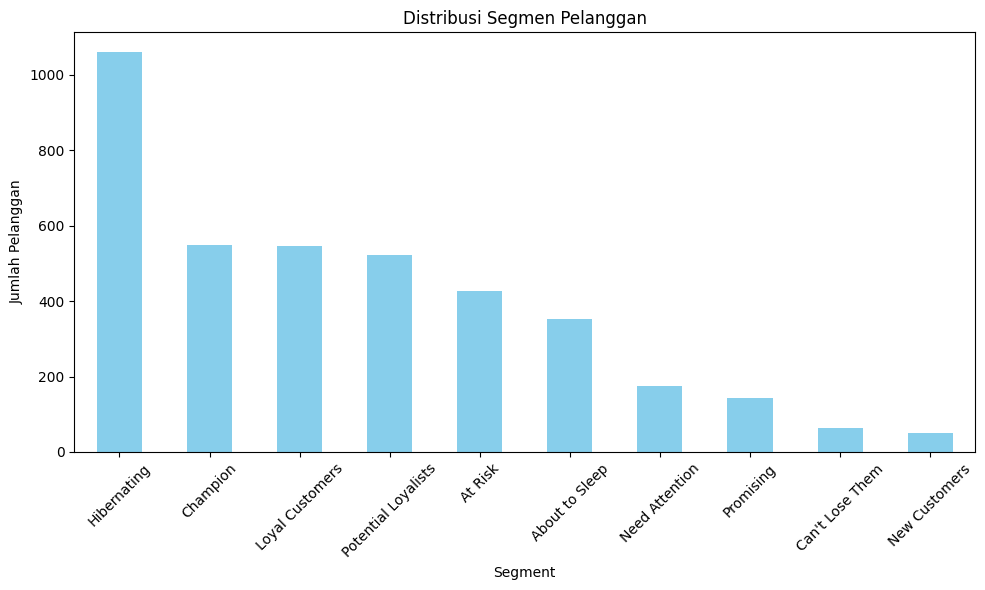

In [119]:
# Analisis dasar data pelanggan
print("Jumlah pelanggan unik:", df_user['customer_id'].nunique())
print("Rata-rata jumlah order per pelanggan:", df_user['order_cnt'].mean())
print("Rata-rata nilai order per pelanggan:", df_user['total_order_value'].mean())
print("Rata-rata hari sejak order terakhir:", df_user['day_since_last_order'].mean())

# Distribusi segmen pelanggan
segment_counts = df_user['segment'].value_counts()
print("\nDistribusi segmen pelanggan:")
print(segment_counts)

# Visualisasi distribusi segmen pelanggan
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
segment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribusi Segmen Pelanggan')
plt.xlabel('Segment')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**

Hasil analisis *RFM Segmentation* menunjukkan bahwa pelanggan dalam segmen **Champion** (550 pelanggan) dan **Loyal Customers** (546 pelanggan) adalah yang paling bernilai dengan frekuensi pembelian tinggi dan jeda waktu singkat. Fokuskan pada program loyalitas dan penawaran khusus untuk mempertahankan mereka. **Potential Loyalists** (523 pelanggan) dan **Promising** (142 pelanggan) menunjukkan potensi menjadi pelanggan setia, sehingga insentif pembelian dan promosi berkelanjutan diperlukan. **Can't Lose Them** (64 pelanggan) dan **At Risk** (426 pelanggan) perlu kampanye *win-back* karena sebelumnya aktif namun mulai menurun. Segmen **Need Attention** (176 pelanggan) membutuhkan perhatian ekstra melalui kampanye personal untuk meningkatkan keterlibatan. **New Customers** (50 pelanggan) dan **About to Sleep** (352 pelanggan) perlu didorong dengan promosi agar tetap aktif. Sementara itu, **Hibernating** (1.060 pelanggan) sudah sangat lama tidak aktif, sehingga perlu dievaluasi apakah layak dilakukan upaya retensi lebih lanjut atau difokuskan ke segmen yang lebih potensial.

### **Persiapan Dataset Visualisasi Dashboard**

In [120]:
df_user.to_csv('../data/customer_segmentation.csv', index=False)

## **Kesimpulan**


**User Segmentation** mengidentifikasi segmen dengan loyalitas tinggi seperti **Champion** dan **Loyal Customers**, yang perlu diberikan program loyalitas. Sementara segmen seperti **At Risk** membutuhkan kampanye *win-back* untuk menarik kembali pelanggan yang menurun.